In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import os

In [2]:
A= pd.read_csv("C:\\Users\\Arunita.000\\Downloads\\MLP\\german_credit_data.csv")

In [3]:
A.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
A.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
A.shape

(1000, 11)

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
A.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
A.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
A.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [10]:
len(A.columns)

11

In [11]:
A['Age'][0:5]

0    67
1    22
2    49
3    45
4    53
Name: Age, dtype: int64

In [12]:
A.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [13]:
A.Age.unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

In [14]:
A.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [15]:
A.Risk.unique()

array(['good', 'bad'], dtype=object)

In [16]:
A.Job.unique()

array([2, 1, 3, 0], dtype=int64)

In [17]:
A.Housing.unique()

array(['own', 'free', 'rent'], dtype=object)

In [18]:
A.Purpose.unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [19]:
A['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [20]:
A['Credit amount'].value_counts()

1258    3
1262    3
1393    3
1478    3
1275    3
       ..
759     1
760     1
763     1
2812    1
6143    1
Name: Credit amount, Length: 921, dtype: int64

In [21]:
A['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [22]:
num_a=['Age' , 'Credit amount' , 'Duration']

cat_a=['Sex' , 'Job' , 'Housing' , 'Saving accounts' , 'Checking account' , 'Purpose']

In [23]:
A.corr()

,Unnamed: 0,Age,Job,Credit amount,Duration
Unnamed: 0,1.000000,-0.010096,-0.027345,0.013488,0.030788
Age,-0.010096,1.000000,0.015673,0.032716,-0.036136
Job,-0.027345,0.015673,1.000000,0.285385,0.210910
Credit amount,0.013488,0.032716,0.285385,1.000000,0.624984
Duration,0.030788,-0.036136,0.210910,0.624984,1.000000


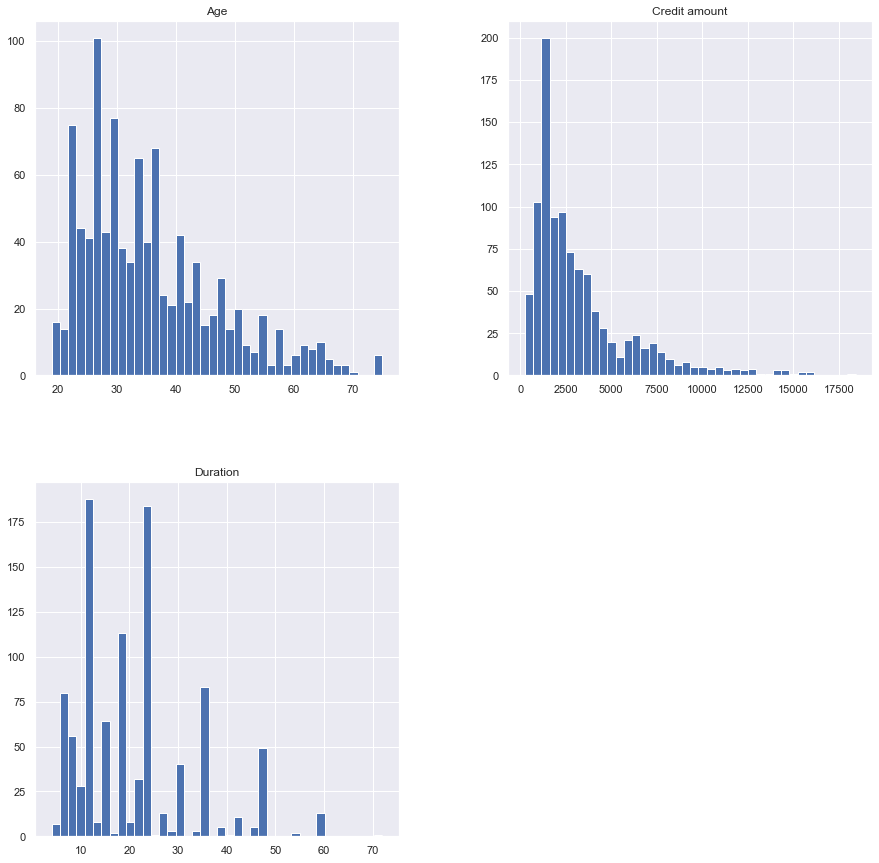

In [24]:
A[num_a].hist(bins=40, figsize=(15,15)) 
plt.show()

In [25]:
A = A.drop('Unnamed: 0', axis='columns')
A.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


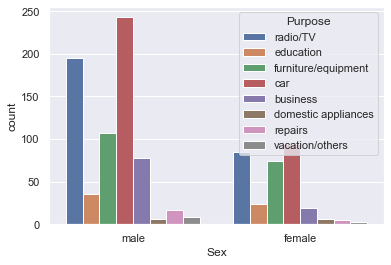

In [26]:
sns.countplot(data=A, x='Sex', hue='Purpose')
plt.show()

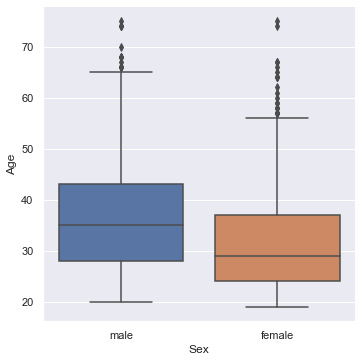

In [27]:
sns.catplot(data=A, x='Sex', y='Age', kind='box')
plt.show()

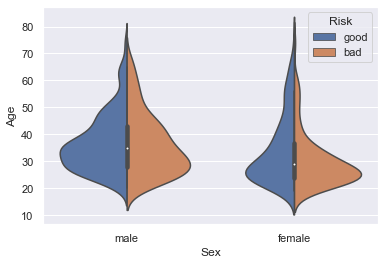

In [28]:
sns.violinplot(data=A, x='Sex', y='Age', hue='Risk', split=True)
plt.show()

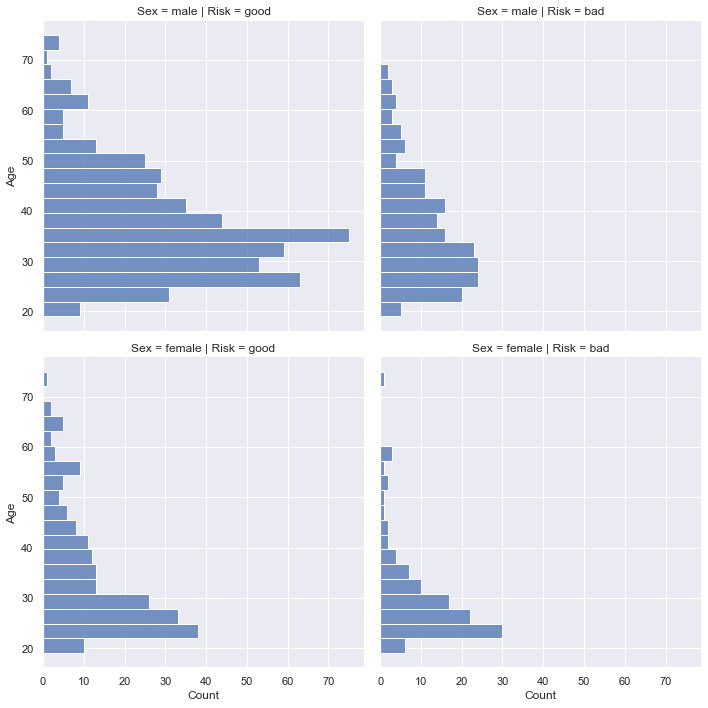

In [29]:
sns.displot(data=A, row='Sex', y='Age', col='Risk')
plt.show()

In [30]:
A['Saving accounts'] = A['Saving accounts'].fillna('Nil')

In [31]:
A.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,Nil,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import LabelEncoder

In [33]:
X= A.drop(['Risk'], axis=1)
y= A['Risk']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

# Decision Tree Classification

In [34]:
D= DecisionTreeClassifier(criterion="gini", max_depth=None)

In [35]:
le = LabelEncoder()
X_train[cat_a] = X_train[cat_a].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
ss = StandardScaler()
ss.fit_transform(X_train[num_a])

array([[-1.02851468,  0.40300195, -0.08813726],
       [-0.94000223, -0.39736959, -1.01022548],
       [ 0.65322189, -0.21413846, -0.42344207],
       ...,
       [-0.40892752, -0.618446  , -0.92639928],
       [-0.49743997, -0.43783781, -0.75874688],
       [-1.02851468,  2.27615613,  1.25308196]])

In [37]:
a = X_train[cat_a]
b = ss.transform(X_train[num_a])

Xtr = np.hstack([a,b])
Xtr.shape 

(700, 9)

In [38]:
D = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [39]:
D.fit(Xtr,y_train)

DecisionTreeClassifier()

In [40]:
a1 = X_test[cat_a]
b1 = ss.transform(X_test[num_a])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

(300, 9)

In [42]:
ss = StandardScaler()
ss.fit_transform(X_test[num_a])
le = LabelEncoder()
X_test[cat_a] = X_test[cat_a].apply(le.fit_transform)
a1 = X_test[cat_a]
b1 = ss.transform(X_test[num_a])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[-4.65867625e-01, -4.59526348e-01, -6.94037034e-01],
       [ 1.41031886e-01,  2.96114764e+00,  2.22594737e+00],
       [ 4.01131677e-01, -6.63550916e-01, -1.18070110e+00],
       [ 1.00803119e+00,  2.91754177e+00,  1.25261924e+00],
       [ 5.43319563e-02,  1.04917326e+00,  7.65955169e-01],
       [ 2.27731817e-01, -8.56753588e-01, -6.94037034e-01],
       [-6.39267485e-01,  8.95756974e-01, -2.07372967e-01],
       [ 8.34631328e-01, -6.87104454e-01, -8.56258390e-01],
       [-1.07276714e+00,  1.59949850e+00, -2.07372967e-01],
       [-6.39267485e-01,  2.46761508e-01,  7.65955169e-01],
       [ 1.41031886e-01,  1.60186340e-01, -8.56258390e-01],
       [ 7.47931398e-01, -3.40803784e-01,  2.79291101e-01],
       [-8.99367276e-01, -6.84558126e-01, -6.94037034e-01],
       [ 1.44153084e+00,  9.61961514e-01, -6.94037034e-01],
       [ 1.09473112e+00,  2.78767902e+00,  2.22594737e+00],
       [ 7.47931398e-01, -6.26310862e-01, -4.50705001e-01],
       [-2.05767834e-01, -4.83398177e-01

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(300, 9)

In [43]:
y_pred = D.predict(Xtr1)
print(f"Accuracy is {np.sum((y_test == y_pred))/y_test.size}")

Accuracy is 0.6466666666666666


# KN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(1-accuracy_score(y_test, pred_i))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=22, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)